# IMPORTACIÓN DE LIBRERÍAS

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import ctypes

# PREPROCESAMIENTO

In [2]:
color_azul = (0,0,255)
color_blanco = (255,255,255)
color_rojo = (255,0,0)
color_verde = (0,255,0)
color_celeste = (0,255,255)

########### PRE PROCESAMIENTO QUE SE REALIZÓ EN LA BASE DE DATOS ############

imageini = cv2.imread('C:/Users/Angel Terrones/Desktop/TESIS/1.png')[...,::-1]
image_blur = cv2.GaussianBlur(imageini,(11,11),0) 
gray = cv2.cvtColor(image_blur, cv2.COLOR_RGB2GRAY)
rgb_imagen = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
_,th = cv2.threshold(gray,75,255,cv2.THRESH_BINARY)
final=cv2.bitwise_and(rgb_imagen,rgb_imagen,mask=th)
final_gray = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY) 
clahe=cv2.createCLAHE(clipLimit=3,tileGridSize=(8,8))
clahe_img=clahe.apply(final_gray)


####### IMAGEN FINAL QUE SE GUARDÓ EN EL NOTEBOOK BASE DE DATOS#####

final_rgb_coord = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)
final_rgb_centr = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

# MÉTODO LÍMITE DE COORDENADAS

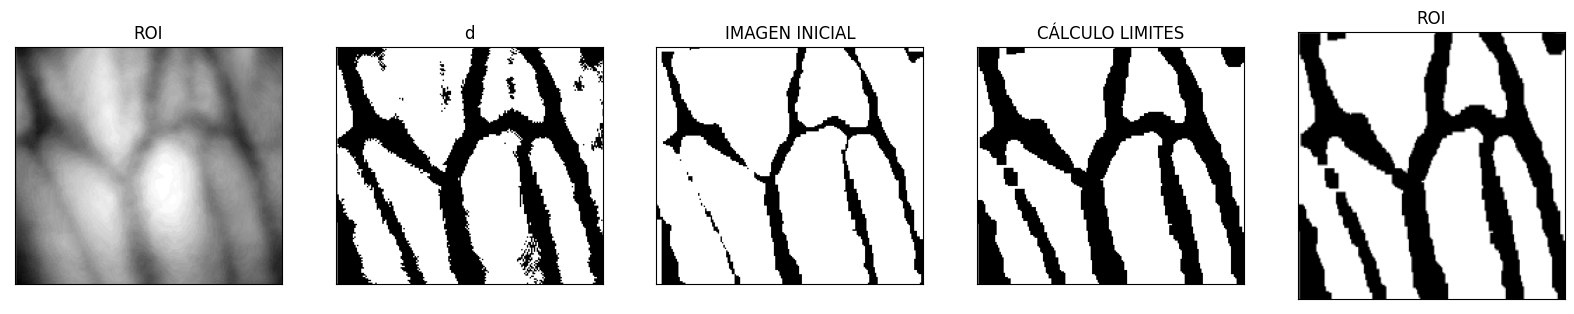

In [6]:
######### CÁLCULO DE PUNTOS LÍMITES #########

contornos,_ = cv2.findContours(th,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contornos,key=cv2.contourArea,reverse=True)[:1]
c = max(contornos, key=cv2.contourArea)
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])


######## EXTRACCIÓN DEL ROI ########

cv2.circle(final_rgb_coord,extLeft,10,color_azul,-1)
cv2.circle(final_rgb_coord,extRight,10,color_blanco,-1)
cv2.circle(final_rgb_coord,extTop,10,color_rojo,-1)
cv2.drawContours(final_rgb_coord, cnts,0, color_verde, 1)
cv2.rectangle(final_rgb_coord,(extLeft[0]+90,extTop[1]+90),(extRight[0]-90,extTop[1]+260),color_celeste,1)
ROI = final_rgb_coord[extTop[1]+90:extTop[1]+260,extLeft[0]+90:extRight[0]-90]
ROI = cv2.cvtColor(ROI, cv2.COLOR_RGB2GRAY)

############ MEJORA Y SEGMENTACIÓN ###########

th3 = cv2.adaptiveThreshold(ROI,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,67,2)
dilation = cv2.dilate(th3,kernel= np.ones((6,6)),iterations = 1)
Erosion = cv2.erode(dilation,kernel = np.ones((7,7)),iterations = 1)
Database = cv2.resize(Erosion, (227, 227))

################# GRÁFICOS ###################

titles = ['ROI','d','IMAGEN INICIAL','CÁLCULO LIMITES','ROI']
images = [ROI,th3,dilation,Erosion,Database]#,ROI
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(1,5,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# MÉTODO DEL CENTROIDE

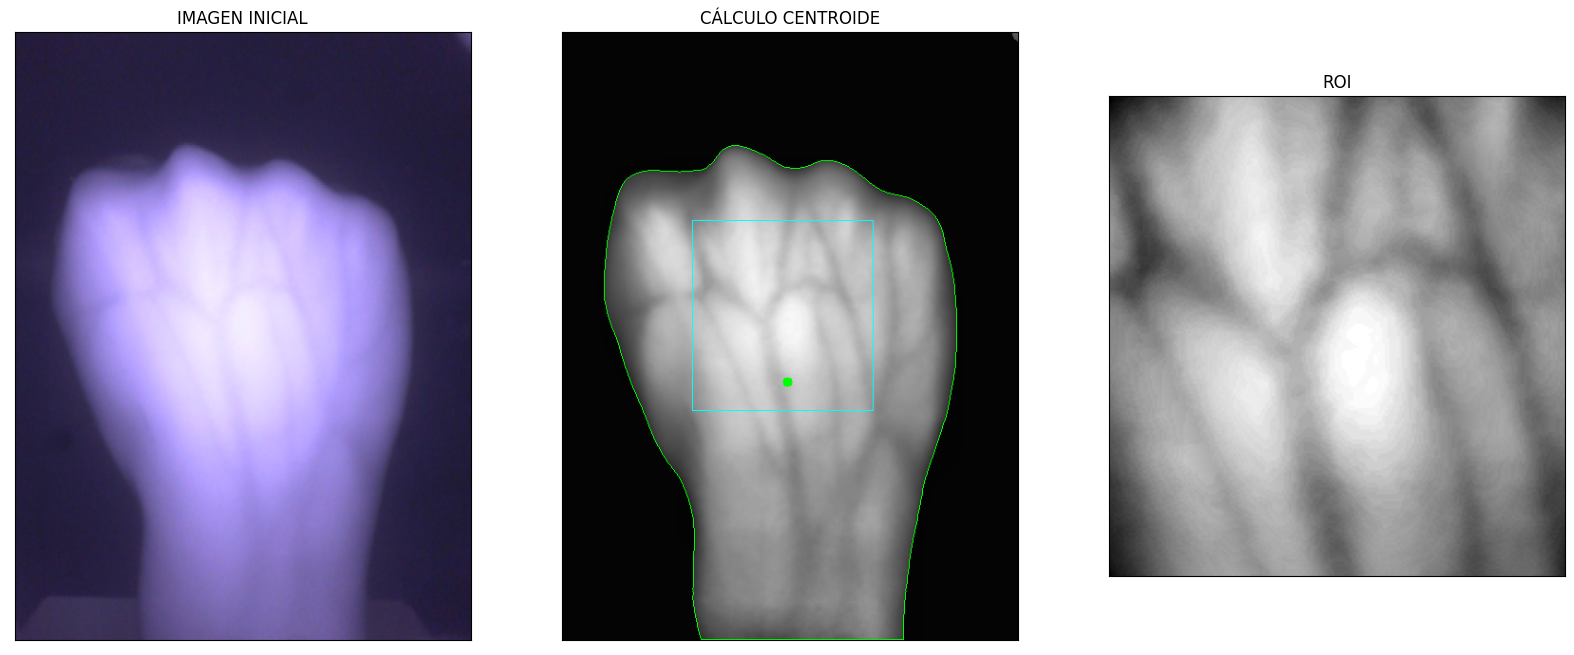

In [52]:
########### CÁLCULO DEL CENTROIDE #############

contornos,_ = cv2.findContours(th,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contornos,key=cv2.contourArea,reverse=True)[:1]
cv2.drawContours(final_rgb_centr, cnts,0, color_verde, 1)
for cnt in cnts:
    M = cv2.moments(cnt)
    if M["m00"] == 0: 
        M["m00"]=1
    x = int(M["m10"]/M["m00"])
    y = int(M["m01"]/M["m00"])
    cv2.circle(final_rgb_centr,tuple([x,y]),5,(0,255,0),-1)

    
######## EXTRACCIÓN DEL ROI ########
cv2.rectangle(final_rgb_centr,(x-100,y-170),(x+90,y+30),color_celeste,1)
ROI2 = clahe_img[y-170:y+30,x-100:x+90]

############ MEJORA Y SEGMENTACIÓN ###########

th3 = cv2.adaptiveThreshold(ROI2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,67,2)
dilation=cv2.dilate(th3,kernel= np.ones((6,6)),iterations = 1)
Erosion = cv2.erode(dilation,kernel = np.ones((7,7)),iterations = 1)
Database = cv2.resize(Erosion, (227, 227))

################# GRÁFICOS ###################

titles = ['IMAGEN INICIAL','CÁLCULO CENTROIDE','ROI']
images = [imageini,final_rgb_centr,ROI2]#,ROI
plt.figure(figsize=(20,20))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()